In [270]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [271]:
### Carregando os dados para o projeto
df_cartoes = pd.read_csv("../data/raw/campeonato-brasileiro-cartoes.csv");
df_stats_full = pd.read_csv("../data/raw/campeonato-brasileiro-estatisticas-full.csv");
df_full = pd.read_csv("../data/raw/campeonato-brasileiro-full.csv");
df_gols = pd.read_csv("../data/raw/campeonato-brasileiro-gols.csv");

### Imprimindo as informações básicas de cada dataframe
print("Dataframe de cartões info")
print(df_cartoes.info())
print("Dataframe de stats info")
print(df_stats_full.info())
print("Dataframe todas as informações info")
print(df_full.info())
print("Dataframe de gols info")
print(df_gols.info())

### Imprimindo a "cabeça" de cada dataframe
print("Dataframe de cartoes")
print(df_cartoes.head())
print("Dataframe de stats")
print(df_stats_full.head())
print("Dataframe de informações")
print(df_full.head())
print("Dataframe de gols")
print(df_gols.head())

Dataframe de cartões info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18857 entries, 0 to 18856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   partida_id  18857 non-null  int64  
 1   rodata      18857 non-null  int64  
 2   clube       18857 non-null  object 
 3   cartao      18857 non-null  object 
 4   atleta      18851 non-null  object 
 5   num_camisa  18471 non-null  float64
 6   posicao     17659 non-null  object 
 7   minuto      18857 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB
None
Dataframe de stats info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16810 entries, 0 to 16809
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   partida_id       16810 non-null  int64 
 1   rodata           16810 non-null  int64 
 2   clube            16810 non-null  object
 3   chutes           16810 non

In [272]:
### Função para unir as tabelas com relação 1:2
def unir_tabelas_um_para_dois_chaves_diferentes(tabela1, tabela2, chave_tabela1, chave_tabela2, colunas_tabela2):
    """
    Une duas tabelas (um para dois) transformando as duas linhas correspondentes na tabela2 em duas colunas distintas,
    quando a chave de ligação entre as tabelas tem nomes diferentes.

    Parâmetros:
    tabela1 (pd.DataFrame): A tabela do lado 'um' da relação.
    tabela2 (pd.DataFrame): A tabela do lado 'dois' da relação.
    chave_tabela1 (str): O nome da coluna chave na tabela1.
    chave_tabela2 (str): O nome da coluna chave na tabela2.
    colunas_tabela2 (list): Lista de colunas da tabela2 que devem ser transformadas em colunas únicas na nova tabela.

    Retorno:
    pd.DataFrame: A tabela resultante da união."""
    
    
    # Primeiro, adicionamos um identificador único para distinguir as duas entradas (pode ser uma numeração)
    tabela2['linha'] = tabela2.groupby(chave_tabela2).cumcount() + 1
    
    # Fazemos o pivot para transformar as duas linhas em duas colunas
    tabela_pivot = tabela2.pivot(index=chave_tabela2, columns='linha', values=colunas_tabela2)
    
    # Renomeamos as colunas para que fiquem claras
    tabela_pivot.columns = ['{}_{}'.format(col, val) for col, val in tabela_pivot.columns]
    
    # Juntamos a tabela pivotada com a tabela original (tabela1)
    resultado_final = pd.merge(tabela1, tabela_pivot, left_on=chave_tabela1, right_on=chave_tabela2, how='left')
    
    return resultado_final

df_merged = unir_tabelas_um_para_dois_chaves_diferentes(tabela1=df_full, tabela2=df_stats_full, chave_tabela1='ID', chave_tabela2='partida_id',colunas_tabela2=['clube','chutes','chutes_no_alvo','posse_de_bola','passes','precisao_passes','faltas','cartao_amarelo','cartao_vermelho','impedimentos','escanteios'])

display(df_merged)
df_merged.info()
df_merged.describe()

,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado,clube_1,clube_2,chutes_1,chutes_2,chutes_no_alvo_1,chutes_no_alvo_2,posse_de_bola_1,posse_de_bola_2,passes_1,passes_2,precisao_passes_1,precisao_passes_2,faltas_1,faltas_2,cartao_amarelo_1,cartao_amarelo_2,cartao_vermelho_1,cartao_vermelho_2,impedimentos_1,impedimentos_2,escanteios_1,escanteios_2
0,1,1,29/03/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ,Guarani,Vasco,0,0,0,0,NaN,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0
1,2,1,29/03/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS,Gremio,Athletico-PR,0,0,0,0,NaN,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0
2,3,1,30/03/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR,Coritiba,Flamengo,0,0,0,0,NaN,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0
3,4,1,30/03/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA,Paysandu,Goias,0,0,0,0,NaN,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0
4,5,1,30/03/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP,Ponte Preta,Internacional,0,0,0,0,NaN,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,8401,38,06/12/2023,21:32,Bahia,Atletico-MG,3-4-2-1,4-4-2,R. Ceni,L. Scolari,Bahia,Itaipava Arena Fonte Nova,4,1,BA,MG,Atletico-MG,Bahia,7,15,5,6,64%,36%,550,318,84%,75%,10,16,2,2,0,0,3,2,5,3
8401,8402,38,06/12/2023,21:32,Cuiaba,Athletico-PR,5-3-2,3-4-3,A. Cardoso de Oliveira,W. Carvalho,Cuiaba,Arena Pantanal,3,0,MT,PR,Athletico-PR,Cuiaba,17,14,3,6,57%,43%,506,400,87%,85%,15,9,3,2,0,1,2,3,9,5
8402,8403,38,06/12/2023,21:32,Santos,Fortaleza,3-4-1-2,4-2-3-1,M. Fernandes,J. Vojvoda,Fortaleza,Estádio Urbano Caldeira,1,2,SP,CE,Fortaleza,Santos,14,15,7,6,45%,55%,295,353,70%,77%,9,15,3,2,0,0,2,4,6,10
8403,8404,38,06/12/2023,21:32,Sao Paulo,Flamengo,4-2-3-1,4-2-3-1,D. Silvestre Júnior,A. Bacchi,Sao Paulo,Morumbi,1,0,SP,RJ,Sao Paulo,Flamengo,9,10,3,2,42%,58%,406,535,84%,89%,13,16,0,3,0,0,2,0,4,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405 entries, 0 to 8404
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  8405 non-null   int64 
 1   rodata              8405 non-null   int64 
 2   data                8405 non-null   object
 3   hora                8405 non-null   object
 4   mandante            8405 non-null   object
 5   visitante           8405 non-null   object
 6   formacao_mandante   3431 non-null   object
 7   formacao_visitante  3431 non-null   object
 8   tecnico_mandante    3795 non-null   object
 9   tecnico_visitante   3795 non-null   object
 10  vencedor            8405 non-null   object
 11  arena               8405 non-null   object
 12  mandante_Placar     8405 non-null   int64 
 13  visitante_Placar    8405 non-null   int64 
 14  mandante_Estado     8405 non-null   object
 15  visitante_Estado    8405 non-null   object
 16  clube_1             8405

,ID,rodata,mandante_Placar,visitante_Placar
count,8405.00000,8405.000000,8405.000000,8405.000000
mean,4203.00000,20.133254,1.541225,1.027008
std,2426.45884,11.444643,1.230607,1.027170
min,1.00000,1.000000,0.000000,0.000000
25%,2102.00000,10.000000,1.000000,0.000000
50%,4203.00000,20.000000,1.000000,1.000000
75%,6304.00000,30.000000,2.000000,2.000000
max,8405.00000,46.000000,7.000000,7.000000


In [273]:
### Realizando a transformação dos tipos de dados
df_merged['chutes_1'] = df_merged['chutes_1'].astype('int64')
df_merged['chutes_2'] = df_merged['chutes_2'].astype('int64')
df_merged['chutes_no_alvo_1'] = df_merged['chutes_no_alvo_1'].astype('int64')
df_merged['chutes_no_alvo_2'] = df_merged['chutes_no_alvo_2'].astype('int64')
df_merged['passes_1'] = df_merged['passes_1'].astype('int64')
df_merged['passes_2'] = df_merged['passes_2'].astype('int64')
df_merged['escanteios_1'] = df_merged['escanteios_1'].astype('int64')
df_merged['escanteios_2'] = df_merged['escanteios_2'].astype('int64')
df_merged['impedimentos_2'] = df_merged['impedimentos_2'].astype('int64')
df_merged['impedimentos_1'] = df_merged['impedimentos_1'].astype('int64')
df_merged['faltas_1'] = df_merged['faltas_1'].astype('int64')
df_merged['faltas_2'] = df_merged['faltas_2'].astype('int64')
df_merged['cartao_amarelo_1'] = df_merged['cartao_amarelo_1'].astype('int64')
df_merged['cartao_amarelo_2'] = df_merged['cartao_amarelo_2'].astype('int64')
df_merged['cartao_vermelho_1'] = df_merged['cartao_vermelho_1'].astype('int64')
df_merged['cartao_vermelho_2'] = df_merged['cartao_vermelho_2'].astype('int64')

### Transformando as variáveis que continham porcentagens em texto em valores float entre 0 e 1 
df_merged['precisao_passes_1'] = df_merged['precisao_passes_1'].str.rstrip('%').astype('float') / 100.0
df_merged['precisao_passes_2'] = df_merged['precisao_passes_2'].str.rstrip('%').astype('float') / 100.0
df_merged['posse_de_bola_1'] = df_merged['posse_de_bola_1'].str.rstrip('%').astype('float') / 100.0
df_merged['posse_de_bola_2'] = df_merged['posse_de_bola_2'].str.rstrip('%').astype('float') / 100.0


In [274]:
### Visualizando as informações depois da transformação
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405 entries, 0 to 8404
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  8405 non-null   int64  
 1   rodata              8405 non-null   int64  
 2   data                8405 non-null   object 
 3   hora                8405 non-null   object 
 4   mandante            8405 non-null   object 
 5   visitante           8405 non-null   object 
 6   formacao_mandante   3431 non-null   object 
 7   formacao_visitante  3431 non-null   object 
 8   tecnico_mandante    3795 non-null   object 
 9   tecnico_visitante   3795 non-null   object 
 10  vencedor            8405 non-null   object 
 11  arena               8405 non-null   object 
 12  mandante_Placar     8405 non-null   int64  
 13  visitante_Placar    8405 non-null   int64  
 14  mandante_Estado     8405 non-null   object 
 15  visitante_Estado    8405 non-null   object 
 16  clube_

In [275]:
df_merged_new = df_merged.copy(True)

In [276]:
### Retirando as colunas do tipo objeto que não foram consideradas importantes para a análise
df_merged_new.drop(['clube_1', 'clube_2', 'visitante_Estado','mandante_Estado', 'data', 'hora',
                    'mandante', 'visitante','formacao_mandante', 'formacao_visitante',
                    'tecnico_mandante', 'tecnico_visitante', 'arena', 'rodata', 'ID'], axis=1, inplace=True)
df_merged_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405 entries, 0 to 8404
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vencedor           8405 non-null   object 
 1   mandante_Placar    8405 non-null   int64  
 2   visitante_Placar   8405 non-null   int64  
 3   chutes_1           8405 non-null   int64  
 4   chutes_2           8405 non-null   int64  
 5   chutes_no_alvo_1   8405 non-null   int64  
 6   chutes_no_alvo_2   8405 non-null   int64  
 7   posse_de_bola_1    3410 non-null   float64
 8   posse_de_bola_2    3410 non-null   float64
 9   passes_1           8405 non-null   int64  
 10  passes_2           8405 non-null   int64  
 11  precisao_passes_1  2256 non-null   float64
 12  precisao_passes_2  2256 non-null   float64
 13  faltas_1           8405 non-null   int64  
 14  faltas_2           8405 non-null   int64  
 15  cartao_amarelo_1   8405 non-null   int64  
 16  cartao_amarelo_2   8405 

In [277]:
### Criando a coluna resultado para especificar de forma numérica o resultado de cada confronto
condicoes = [
    (df_merged_new['mandante_Placar'] == df_merged_new['visitante_Placar']),
    (df_merged_new['mandante_Placar'] > df_merged_new['visitante_Placar']),
    (df_merged_new['mandante_Placar'] < df_merged_new['visitante_Placar'])
]
valores = [0,1,2]
df_merged_new['resultado'] = np.select(condicoes, valores)

df_merged_new

,vencedor,mandante_Placar,visitante_Placar,chutes_1,chutes_2,chutes_no_alvo_1,chutes_no_alvo_2,posse_de_bola_1,posse_de_bola_2,passes_1,passes_2,precisao_passes_1,precisao_passes_2,faltas_1,faltas_2,cartao_amarelo_1,cartao_amarelo_2,cartao_vermelho_1,cartao_vermelho_2,impedimentos_1,impedimentos_2,escanteios_1,escanteios_2,resultado
0,Guarani,4,2,0,0,0,0,NaN,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1
1,Athletico-PR,2,0,0,0,0,0,NaN,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1
2,-,1,1,0,0,0,0,NaN,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0
3,-,2,2,0,0,0,0,NaN,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0
4,-,1,1,0,0,0,0,NaN,NaN,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,Bahia,4,1,7,15,5,6,0.64,0.36,550,318,0.84,0.75,10,16,2,2,0,0,3,2,5,3,1
8401,Cuiaba,3,0,17,14,3,6,0.57,0.43,506,400,0.87,0.85,15,9,3,2,0,1,2,3,9,5,1
8402,Fortaleza,1,2,14,15,7,6,0.45,0.55,295,353,0.70,0.77,9,15,3,2,0,0,2,4,6,10,2
8403,Sao Paulo,1,0,9,10,3,2,0.42,0.58,406,535,0.84,0.89,13,16,0,3,0,0,2,0,4,9,1


In [278]:
df_merged_new.drop(['vencedor'], axis=1, inplace=True)

In [279]:
df_merged_new['resultado'].value_counts()
df_merged_new.info()
df_merged_new.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405 entries, 0 to 8404
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mandante_Placar    8405 non-null   int64  
 1   visitante_Placar   8405 non-null   int64  
 2   chutes_1           8405 non-null   int64  
 3   chutes_2           8405 non-null   int64  
 4   chutes_no_alvo_1   8405 non-null   int64  
 5   chutes_no_alvo_2   8405 non-null   int64  
 6   posse_de_bola_1    3410 non-null   float64
 7   posse_de_bola_2    3410 non-null   float64
 8   passes_1           8405 non-null   int64  
 9   passes_2           8405 non-null   int64  
 10  precisao_passes_1  2256 non-null   float64
 11  precisao_passes_2  2256 non-null   float64
 12  faltas_1           8405 non-null   int64  
 13  faltas_2           8405 non-null   int64  
 14  cartao_amarelo_1   8405 non-null   int64  
 15  cartao_amarelo_2   8405 non-null   int64  
 16  cartao_vermelho_1  8405 

,mandante_Placar,visitante_Placar,chutes_1,chutes_2,chutes_no_alvo_1,chutes_no_alvo_2,posse_de_bola_1,posse_de_bola_2,passes_1,passes_2,precisao_passes_1,precisao_passes_2,faltas_1,faltas_2,cartao_amarelo_1,cartao_amarelo_2,cartao_vermelho_1,cartao_vermelho_2,impedimentos_1,impedimentos_2,escanteios_1,escanteios_2,resultado
count,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,3410.000000,3410.000000,8405.000000,8405.000000,2256.000000,2256.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000
mean,1.541225,1.027008,5.252469,5.214396,1.359667,1.358953,0.499006,0.500994,170.937061,171.557406,0.803426,0.805248,6.060321,6.078049,0.945509,0.935277,0.051398,0.052469,0.662582,0.666389,2.119096,2.133968,0.974301
std,1.230607,1.027170,7.122193,7.066267,2.394706,2.380560,0.106332,0.106332,216.448702,217.175778,0.061225,0.058607,7.867540,7.888267,1.473510,1.452598,0.243867,0.241431,1.244076,1.255855,3.184472,3.213769,0.708657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.210000,0.200000,0.000000,0.000000,0.400000,0.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.420000,0.000000,0.000000,0.770000,0.770000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.490000,0.510000,0.000000,0.000000,0.810000,0.810000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,2.000000,11.000000,11.000000,2.000000,2.000000,0.580000,0.580000,386.000000,387.000000,0.850000,0.850000,14.000000,13.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,4.000000,4.000000,1.000000
max,7.000000,7.000000,37.000000,37.000000,18.000000,16.000000,0.800000,0.790000,819.000000,848.000000,0.930000,0.920000,34.000000,31.000000,10.000000,8.000000,3.000000,3.000000,9.000000,10.000000,19.000000,23.000000,2.000000


In [280]:
### preenchendo valores vazios de algumas colunas com a média daquela coluna pois o desvio padrão delas é baixo
df_merged_new['precisao_passes_1'] = df_merged_new['precisao_passes_1'].fillna(df_merged_new['precisao_passes_1'].mean())
df_merged_new['precisao_passes_2'] = df_merged_new['precisao_passes_2'].fillna(df_merged_new['precisao_passes_2'].mean())
df_merged_new['posse_de_bola_1'] = df_merged_new['posse_de_bola_1'].fillna(df_merged_new['posse_de_bola_1'].mean())
df_merged_new['posse_de_bola_2'] = df_merged_new['posse_de_bola_2'].fillna(df_merged_new['posse_de_bola_2'].mean())

In [281]:
### Removendo as últimas colunas irrelevantes e agora com o dataset normalizado para a análise de dados inicial
df_merged_new.drop(['mandante_Placar', 'visitante_Placar'], axis=1, inplace=True)
df_merged_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8405 entries, 0 to 8404
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   chutes_1           8405 non-null   int64  
 1   chutes_2           8405 non-null   int64  
 2   chutes_no_alvo_1   8405 non-null   int64  
 3   chutes_no_alvo_2   8405 non-null   int64  
 4   posse_de_bola_1    8405 non-null   float64
 5   posse_de_bola_2    8405 non-null   float64
 6   passes_1           8405 non-null   int64  
 7   passes_2           8405 non-null   int64  
 8   precisao_passes_1  8405 non-null   float64
 9   precisao_passes_2  8405 non-null   float64
 10  faltas_1           8405 non-null   int64  
 11  faltas_2           8405 non-null   int64  
 12  cartao_amarelo_1   8405 non-null   int64  
 13  cartao_amarelo_2   8405 non-null   int64  
 14  cartao_vermelho_1  8405 non-null   int64  
 15  cartao_vermelho_2  8405 non-null   int64  
 16  impedimentos_1     8405 

In [282]:
### Analisando Outliers
df_auxiliar = df_merged_new.drop(df_merged_new[(df_merged_new['passes_1'] == 0) | (df_merged_new['passes_2'] == 0)].index)

### Preencher os erros com o valor da median dos existentes
df_merged_new.loc[df_merged_new['passes_1'] == 0,'passes_1'] = df_auxiliar['passes_1'].median()
df_merged_new.loc[df_merged_new['passes_2'] == 0,'passes_2'] = df_auxiliar['passes_2'].median()

df_merged_new.describe()

,chutes_1,chutes_2,chutes_no_alvo_1,chutes_no_alvo_2,posse_de_bola_1,posse_de_bola_2,passes_1,passes_2,precisao_passes_1,precisao_passes_2,faltas_1,faltas_2,cartao_amarelo_1,cartao_amarelo_2,cartao_vermelho_1,cartao_vermelho_2,impedimentos_1,impedimentos_2,escanteios_1,escanteios_2,resultado
count,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000,8405.000000
mean,5.252469,5.214396,1.359667,1.358953,0.499006,0.500994,418.161333,420.564545,0.803426,0.805248,6.060321,6.078049,0.945509,0.935277,0.051398,0.052469,0.662582,0.666389,2.119096,2.133968,0.974301
std,7.122193,7.066267,2.394706,2.380560,0.067723,0.067723,63.646086,63.652081,0.031714,0.030359,7.867540,7.888267,1.473510,1.452598,0.243867,0.241431,1.244076,1.255855,3.184472,3.213769,0.708657
min,0.000000,0.000000,0.000000,0.000000,0.210000,0.200000,169.000000,173.000000,0.400000,0.390000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.499006,0.500994,416.000000,419.000000,0.803426,0.805248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.499006,0.500994,416.000000,419.000000,0.803426,0.805248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,11.000000,11.000000,2.000000,2.000000,0.499006,0.500994,416.000000,419.000000,0.803426,0.805248,14.000000,13.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,4.000000,4.000000,1.000000
max,37.000000,37.000000,18.000000,16.000000,0.800000,0.790000,819.000000,848.000000,0.930000,0.920000,34.000000,31.000000,10.000000,8.000000,3.000000,3.000000,9.000000,10.000000,19.000000,23.000000,2.000000


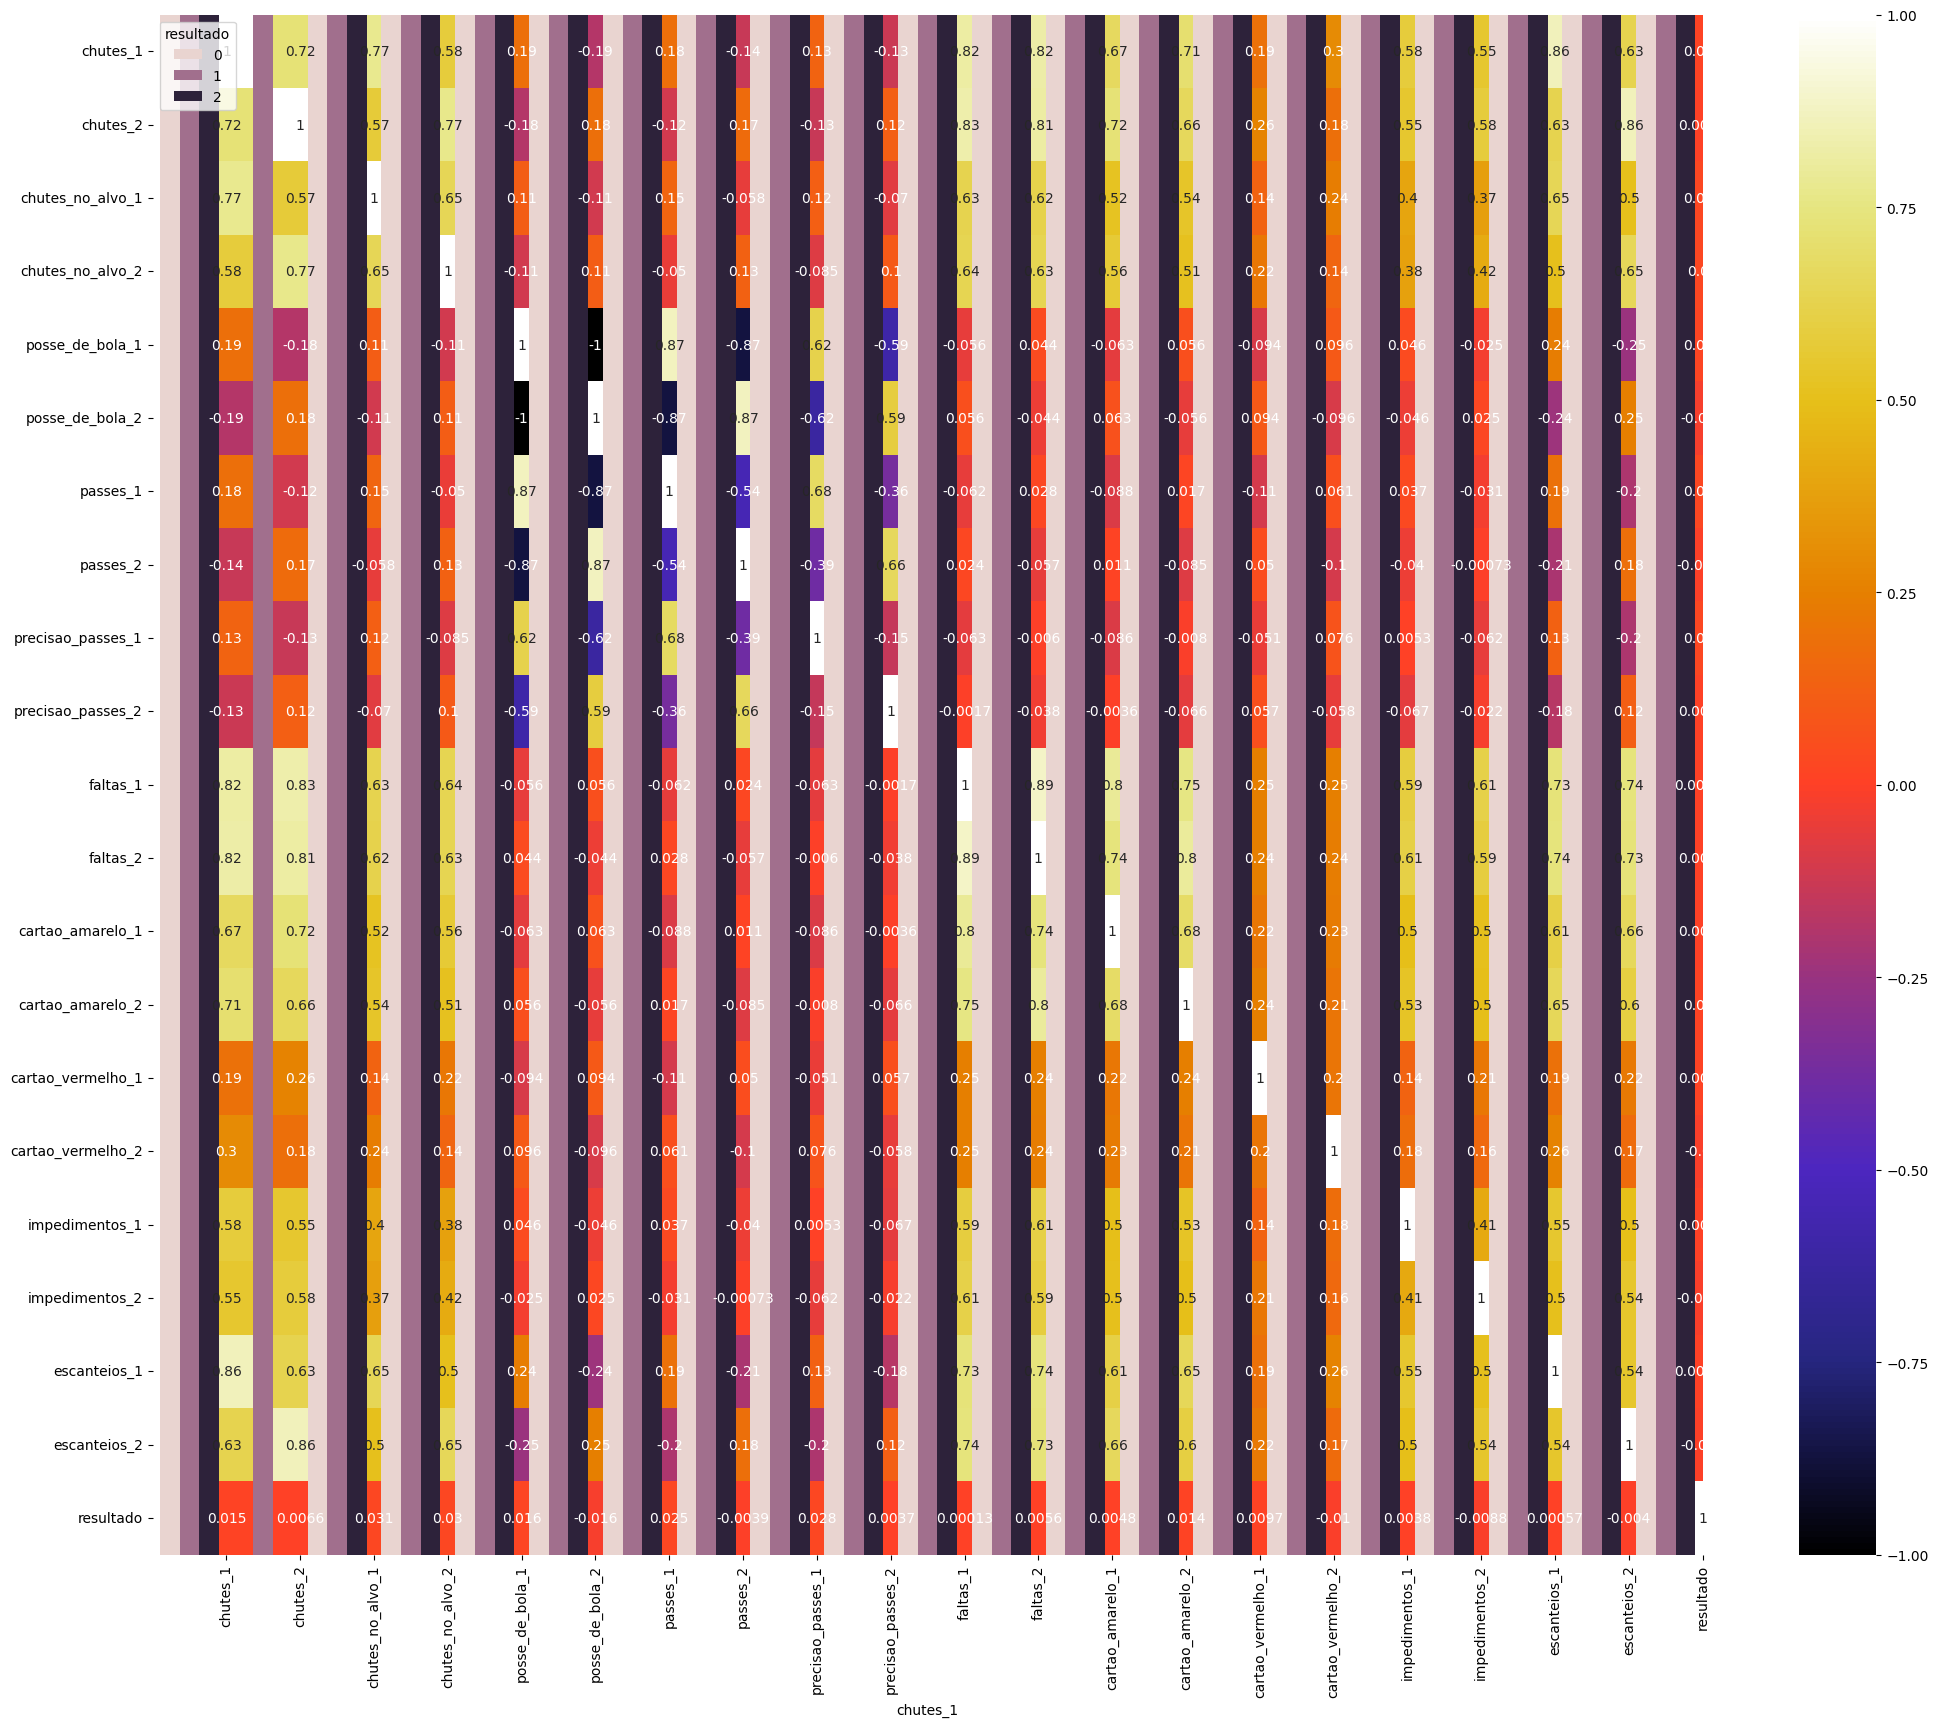

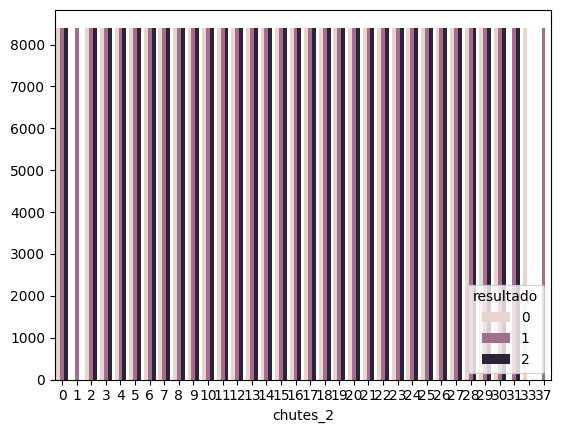

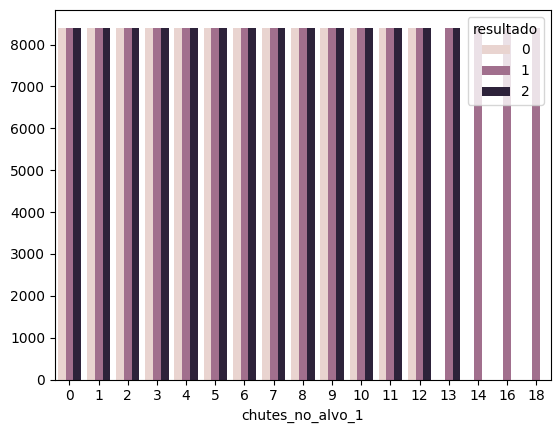

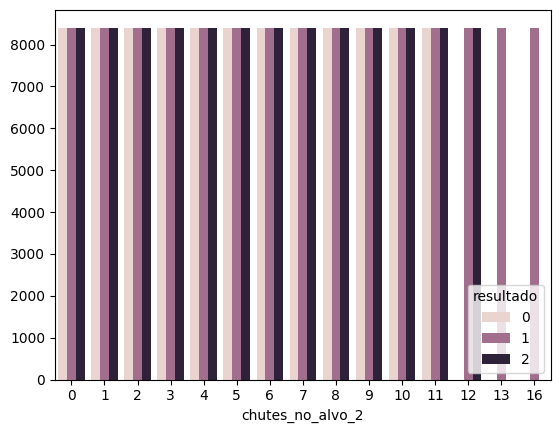

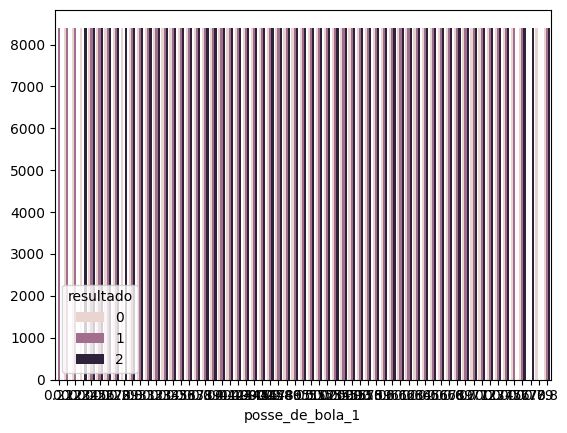

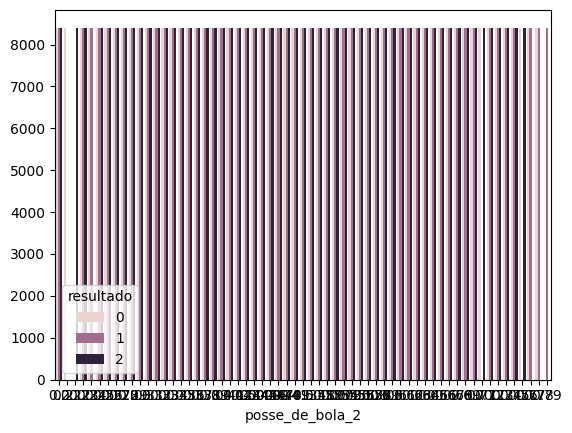

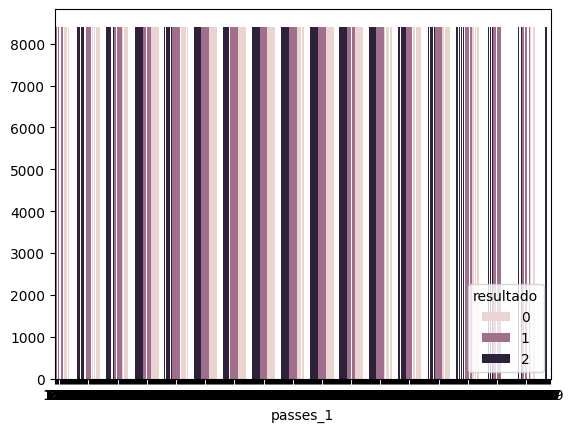

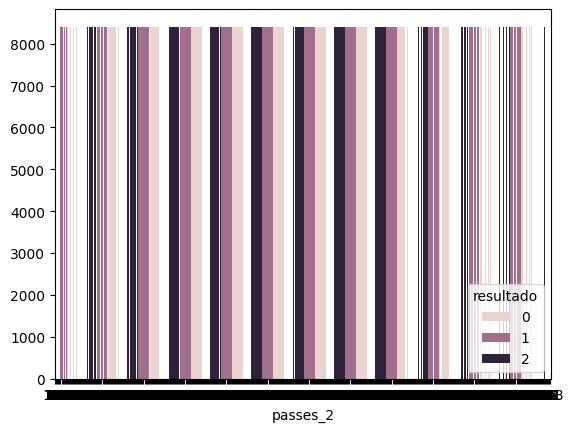

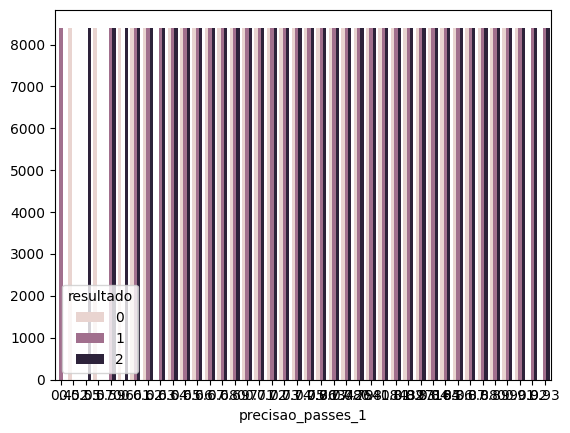

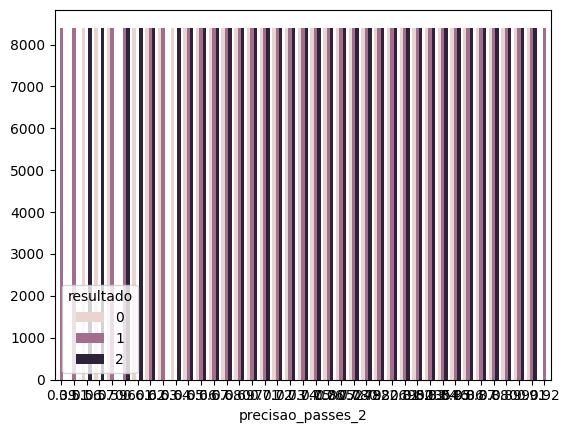

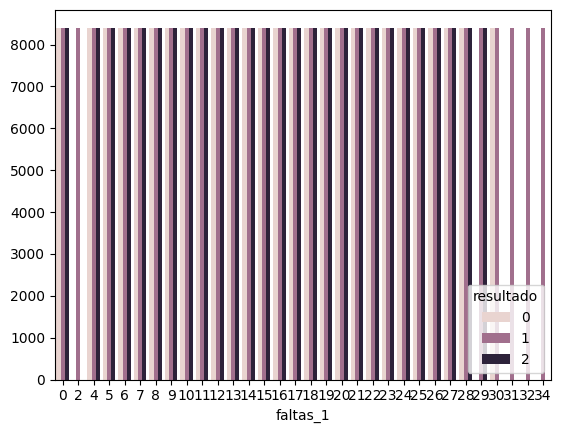

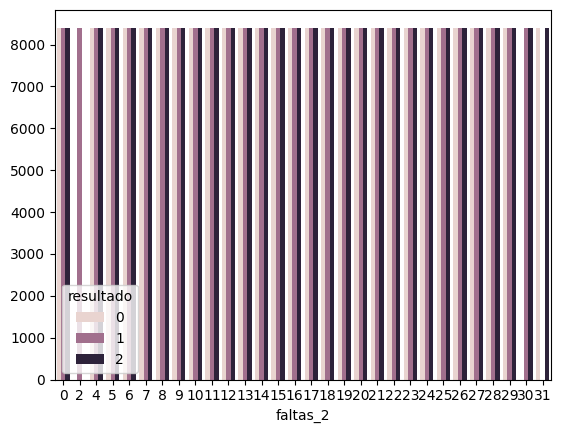

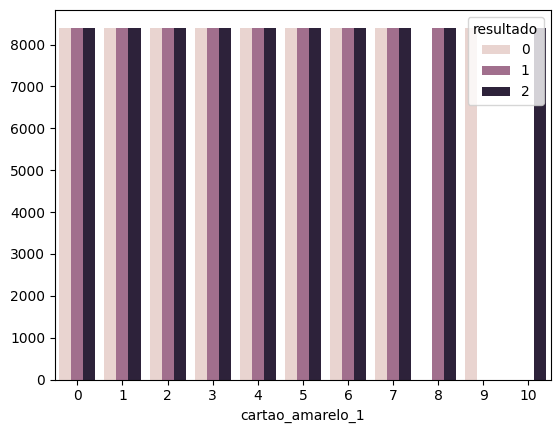

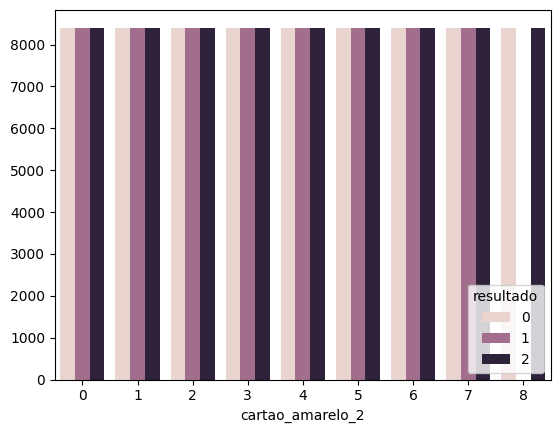

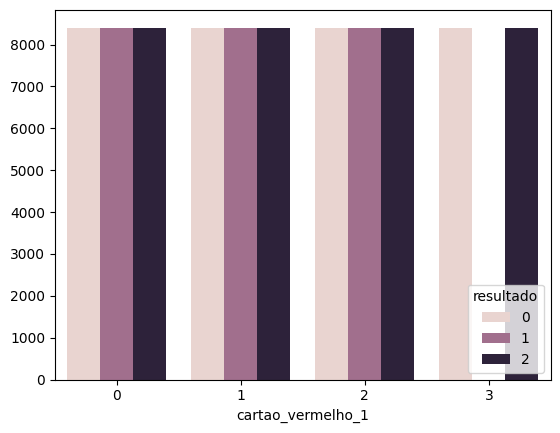

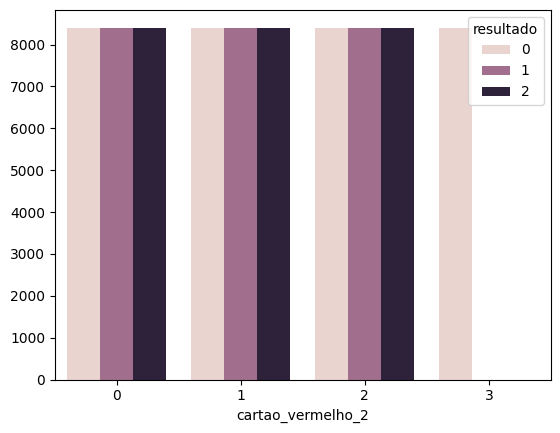

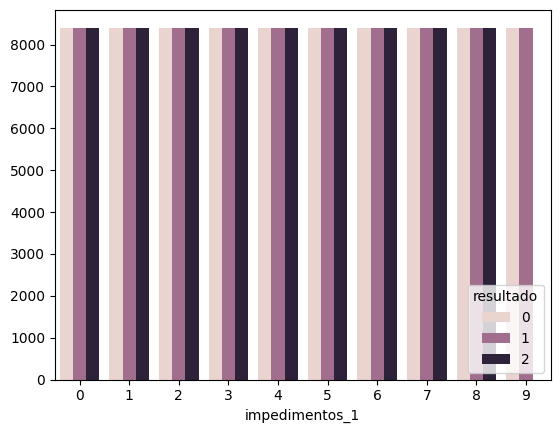

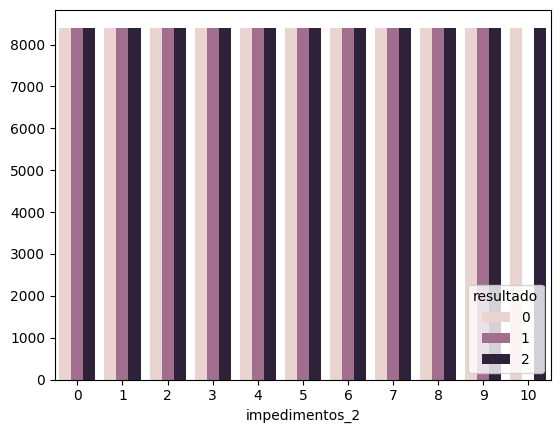

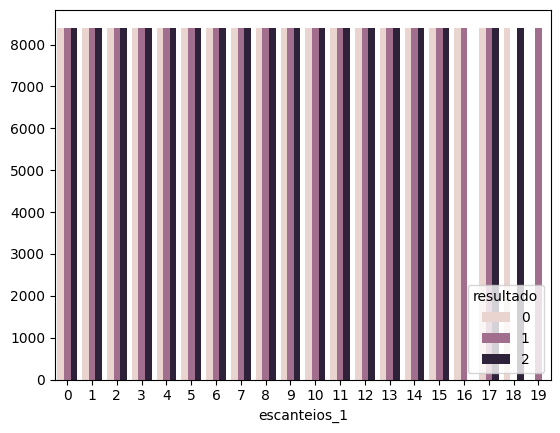

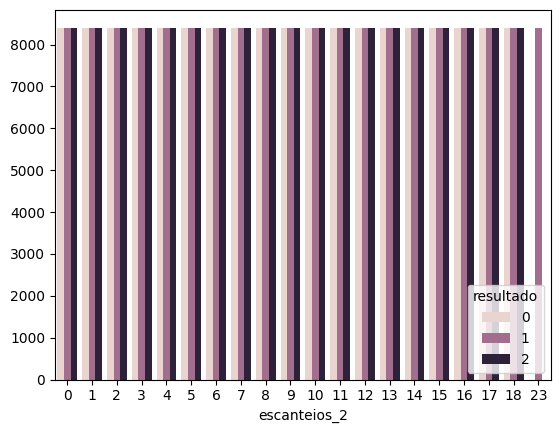

In [283]:
""" ### Identificando as correlações
plt.figure(figsize=(25,20))
sns.heatmap(df_merged_new.corr(), cmap='CMRmap', annot=True)
plt.show()

### Relacionando cada variável com a variável target "resultado"
target = 'resultado'
feature_columns = [col for col in df_merged_new if col != target]

# Gerar gráficos de dispersão
for feature in feature_columns:
    sns.barplot(data=df_merged_new, x=feature, y=df_merged_new[target].count(), hue=target, seed=10)
    plt.show() """